In [4]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt  # Make sure this line is included
import seaborn as sns

In [5]:
# Step 2: Read the Iris dataset
iris_df = pd.read_csv('Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# Step 3: Encode the species
iris_df['Species'] = iris_df['Species'].replace('Iris-setosa', 0)
iris_df['Species'] = iris_df['Species'].replace(['Iris-versicolor', 'Iris-virginica'], 1)
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [10]:
# Step 4: Prepare features and target variable
X = iris_df.drop(['Id', 'Species'], axis=1)
y = iris_df['Species']
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
# Step 5: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (120, 4)
Test set shape: (30, 4)


In [14]:
# Step 6: Create and fit the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [16]:
# Step 7: Make predictions on the test set
y_pred = model.predict(X_test)

In [18]:
# Step 8: Generate and print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[10  0]
 [ 0 20]]


In [20]:
# Step 9: Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


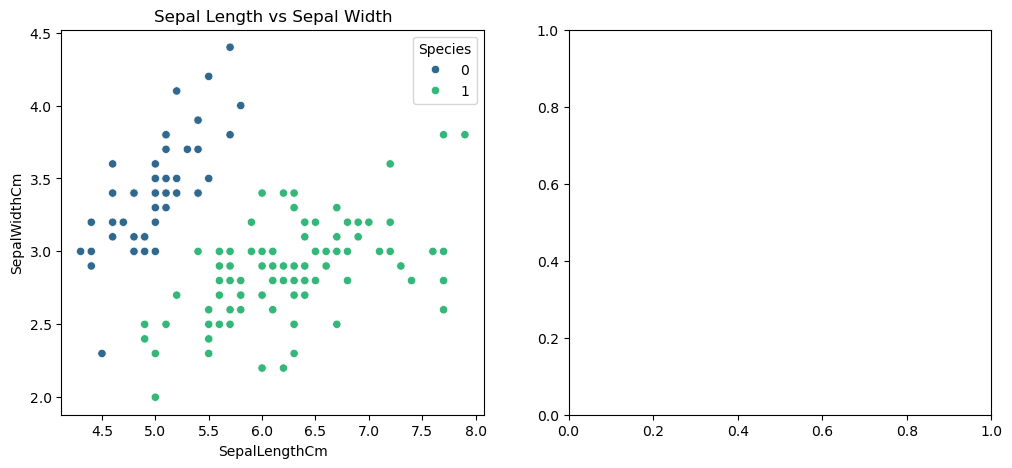

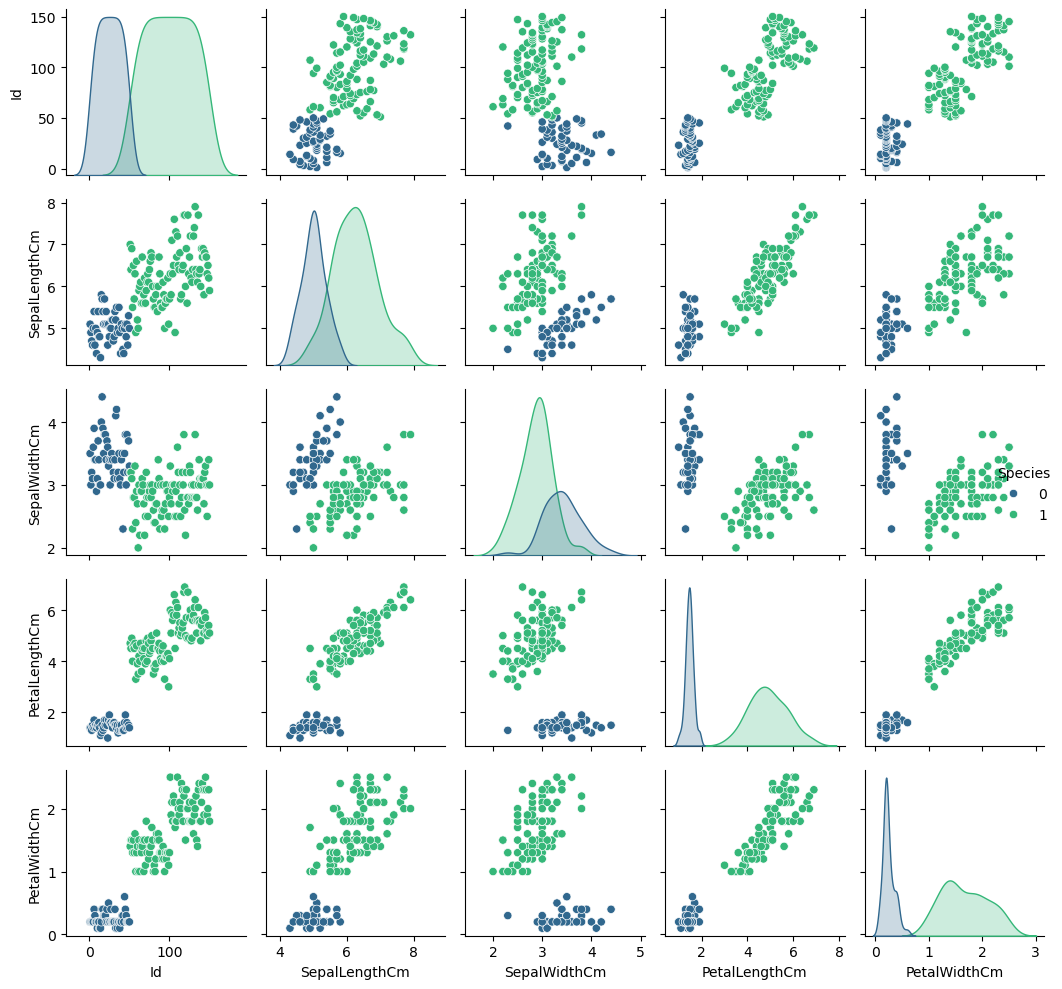

In [22]:
# Step 10: Create scatter plot and pairplot
plt.figure(figsize=(12, 5))

plt.subplot(121)
sns.scatterplot(data=iris_df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette='viridis')
plt.title('Sepal Length vs Sepal Width')

# Convert any infinite values to NaN before creating the pairplot
iris_df_clean = iris_df.replace([np.inf, -np.inf], np.nan).dropna()

plt.subplot(122)
sns.pairplot(iris_df_clean, hue='Species', palette='viridis', height=2)
plt.tight_layout()
plt.show()

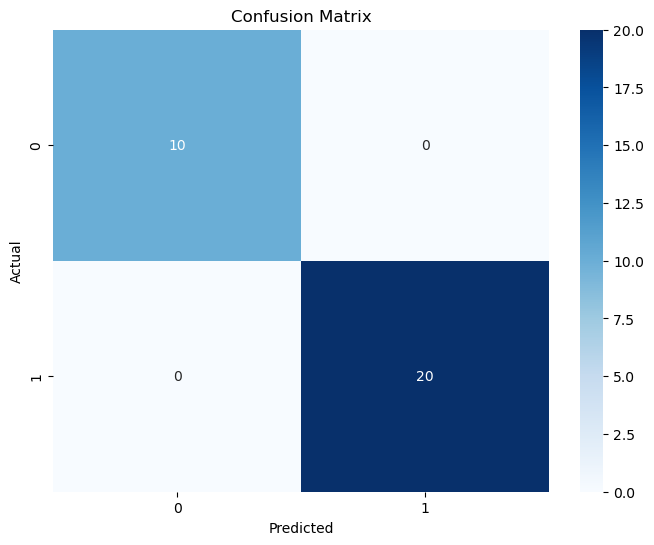

In [24]:
# Step 11: Create confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

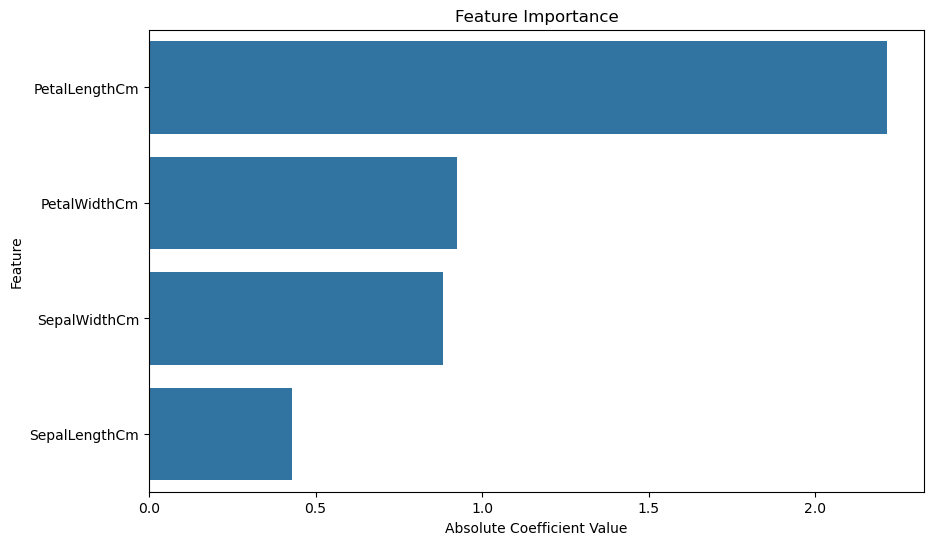

In [26]:
# Step 12: Create feature importance plot
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()